## Email Spam Detection With Machine Learning


### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading The Dataset

In [2]:
# Reading the csv file
df = pd.read_csv('spam.csv', encoding="latin-1", usecols=["v1","v2"])
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Data Processing

In [3]:
# Renaming the columns
df.rename(columns={"v1": "Category","v2": "Message"}, inplace = True)
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Label Encoder

In [4]:
# Importing Label Encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Category"] = le.fit_transform(df["Category"])
df

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


### Analyzing The Dataset

In [5]:
# Shape of the dataset
df.shape

(5572, 2)

In [6]:
# Info of the datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   int32 
 1   Message   5572 non-null   object
dtypes: int32(1), object(1)
memory usage: 65.4+ KB


In [7]:
# Checking for null values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [8]:
# Checking for duplicate values
df.duplicated().sum()

403

In [9]:
# droping duplicates
df = df.drop_duplicates(keep="first")

# Again checking for duplicate values
df.duplicated().sum()

0

In [10]:
# Again checing the shape  of the dataset
df.shape

(5169, 2)

In [11]:
# Ham(0) & Spam(1) counts
df["Category"].value_counts()

Category
0    4516
1     653
Name: count, dtype: int64

### Visualization

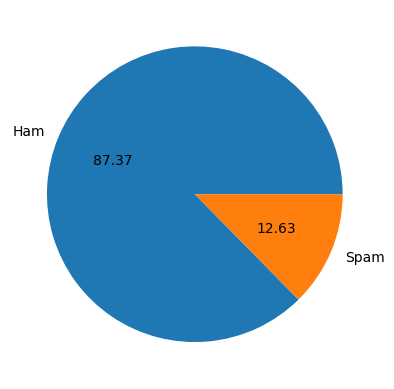

In [12]:
# Pie Chart for value counts in ham and spam
plt.pie(df["Category"].value_counts(),autopct = "%.2f",
        labels=['Ham','Spam'])
plt.show()

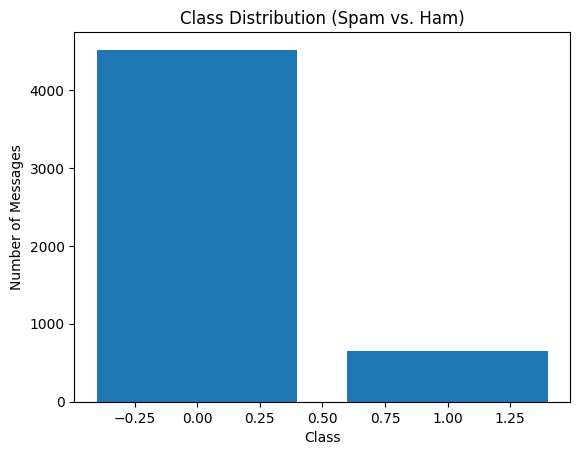

In [13]:
# Class Distribution Bar Chart
class_counts = df['Category'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of Messages')
plt.title('Class Distribution (Spam vs. Ham)')
plt.show()

### Word Cloud

In [14]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)

for val in df.Message:
    val = str(val)
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 600,
                background_color ='#f8f8ff',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

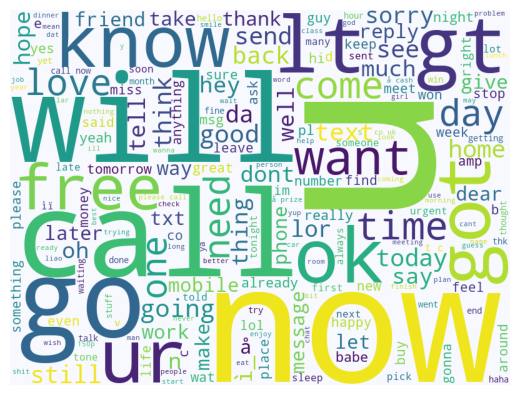

In [15]:
plt.figure(figsize = (5,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### Model Training

In [16]:
x = df['Message']
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5169, dtype: object

In [17]:
y = df["Category"]
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5169, dtype: int32

### Splitting the data into train and test data

In [18]:
# Importing train test split library
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

### Training The Model

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(x_train)

X_train_cv = vectorizer.transform(x_train)
X_test_cv = vectorizer.transform(x_test)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train_cv, y_train)

LogisticRegression()

### Accuracy

In [21]:
y_pred = logreg.predict(X_test_cv)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_cv, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


### Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[885   4]
 [ 18 127]]


### Classification Report

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.97      0.88      0.92       145

    accuracy                           0.98      1034
   macro avg       0.97      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.9787234042553191
Precision: 0.9694656488549618
Recall: 0.8758620689655172
F1 score: 0.9202898550724637


### Custom Word Prediction

In [25]:
# Importing MultinomialNB
from sklearn.naive_bayes import MultinomialNB

# Using MultinomialNB for prediction Custom words
classifier = MultinomialNB()
classifier.fit(X_train_cv, y_train)

MultinomialNB()

In [26]:
custom_word = "Offer for internship"
custom_word_vec = vectorizer.transform([custom_word])
prediction = classifier.predict(custom_word_vec)[0]

if prediction == 1:
    prediction = "Spam"
else:
    prediction = "Ham"

print(f"Custom word '{custom_word}' is predicted as: {prediction}")

Custom word 'Offer for internship' is predicted as: Spam
